In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, neural_network
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import pandas, numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import warnings
warnings.filterwarnings("ignore") # Ignore warnings

In [3]:
df = pd.read_csv('Train.csv')
print('Length of dataset before preprocessing: ', len(df))
print('\n We also have {} different labels/class including {} \n'.format(len(df['Label'].unique()), df['Label'].unique()))

Length of dataset before preprocessing:  1436

 We also have 20 different labels/class including ['POLITICS' 'HEALTH' 'LAW/ORDER' 'RELIGION' 'FARMING'
 'WILDLIFE/ENVIRONMENT' 'SOCIAL ISSUES' 'SOCIAL' 'OPINION/ESSAY'
 'LOCALCHIEFS' 'WITCHCRAFT' 'ECONOMY' 'SPORTS' 'RELATIONSHIPS' 'TRANSPORT'
 'CULTURE' 'EDUCATION' 'MUSIC' 'ARTS AND CRAFTS' 'FLOODING'] 



In [4]:
print('Each sample in raw dataset include a col that contains 15-16 different sentences...\n')
df.head(1500)

Each sample in raw dataset include a col that contains 15-16 different sentences...



,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER
...,...,...,...
1431,ID_zmTmmEio,Eni Minibus Ati Ali ndi Ufulu Wokweza Mitengo ...,TRANSPORT
1432,ID_znOlIaGQ,Kachali apepesa: Kulankhula motumbwa kuthe An...,POLITICS
1433,ID_znracTjN,Mawu supports non-fiction writers The Malawi ...,EDUCATION
1434,ID_ztdsmmva,Tame Mwawa: Phwete ndiye kudya kwake Sewero l...,SOCIAL ISSUES


Generating new table including refID of news agency, sentence in the news, Label of each sentence

In [5]:
X_data = pd.DataFrame(columns=['refID', 'Sentence', 'Label'])
for idx in range(len(df)):
    tmp = df.loc[idx]['Text'].split('\n')
    for jdx in range(len(tmp)):
        X_data = X_data.append({'refID': df.loc[idx]['ID'],'Sentence': tmp[jdx], 'Label': df.loc[idx]['Label']}, ignore_index=True)

preprocessing all samples by changing them to lowercase and erasing punctuations

In [6]:
print('Applying preprocessing steps : Changing all characters to lower-case and removing punctuation')
X_data.loc[:,"Sentence"] = X_data.Sentence.apply(lambda x : str.lower(x))
X_data.loc[:,"Label"] = X_data.Label.apply(lambda x : str.lower(x))
X_data.loc[:,"Sentence"] = X_data.Sentence.str.replace('[^\w\s]','')
X_data.loc[:,"Sentence"] = X_data.Sentence.apply(lambda x : x.translate(string.punctuation))

Applying preprocessing steps : Changing all characters to lower-case and removing punctuation


changing Labels to indecies ...

In [7]:
# label encoder is used for the target variable 
encoder = preprocessing.LabelEncoder()
X_data.loc[:,"Label"] = encoder.fit_transform(X_data.Label)

In [8]:
#To View
X_data

,refID,Sentence,Label
0,ID_AASHwXxg,mwangonde khansala wachinyamata akamati achin...,11
1,ID_AASHwXxg,mbiri ya maphunziro anu ndi yotani maphunziro...,11
2,ID_AASHwXxg,mudayamba bwanji zandale kuyambira ndili wach...,11
3,ID_AASHwXxg,ntchito mukugwira ndi zomwe munkayembekezera ...,11
4,ID_AASHwXxg,masomphenya anu ndi otani pandale ine ndine m...,11
...,...,...,...
16496,ID_zteydTpN,phiri adati zomwe adakambirana akuluakuluwo a...,11
16497,ID_zteydTpN,mmbuyomu kafukufuku yemwe nyuzipepala ya the ...,11
16498,ID_zteydTpN,mchaka cha 2006 mtsogoleri wa dziko lino pete...,11
16499,ID_zteydTpN,pamsonkhanowo padali a zipani zosiyanasiyana ...,11


split the dataset into training and validation datasets

In [9]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_data['Sentence'], X_data['Label'])

In [19]:
train_x

8306                                                      
4143                                                      
12702     mumafesa bwanji choyamba kansichi wathu ali a...
15959    iwo ati bungwe lawo lapeza misika yabwino kunj...
13847     koma yemwe akulondoloza momwe nthendayi ikuye...
                               ...                        
758       ndalama zachuluka ndipo uku ndikuletsa anthu ...
3216       chisale watuluka nkumangidwanso  sipakala wa...
6097      mnzake yemwe adali naye limodzi panthawiyo ma...
10261    maida wati msodzi yemwe anamira mmadziyu akupi...
9077       pa wenela pasintha zedi  anatchereza  tidaku...
Name: Sentence, Length: 12375, dtype: object

In [20]:
valid_x

1394                                                      
13399     inu mungawauze chani alimi anzanu omwe ataya ...
15750     malinga ndi mneneri wapolisi mbomalo cassim m...
13475    polankhulapo ku mbali ya ozengedwa mlandu a mi...
12742     ndale pamaliro nchitonzo katswiri pa zachikha...
                               ...                        
7187      amasankha phungu wawo amene akawalankhulire m...
16116    chilima alangiza ogwira ntchito mboma wachiwir...
11447     iye adati ngati mbali kapena gawo lina likuon...
12986     panopo ukuona ngati mnzakoyo akukukonda mchoo...
5147      mtsogoleriyu wakhala akudzudzula mchitidwe wa...
Name: Sentence, Length: 4126, dtype: object

In [21]:
train_y

8306      7
4143      2
12702     4
15959     4
13847    15
         ..
758      11
3216      6
6097     10
10261     7
9077     19
Name: Label, Length: 12375, dtype: int32

In [22]:
valid_y

1394      7
13399     4
15750     7
13475    14
12742    11
         ..
7187      1
16116    14
11447    11
12986    12
5147     11
Name: Label, Length: 4126, dtype: int32

approach 1 : encoding words using raw term count features for LDA.

In [10]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_data['Sentence'])
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

approach 2 : encoding words using rExtracting tf-idf features for NMF

In [11]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_data['Sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

In [13]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [25]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    #Now, we analyze a some accuracy metrics
    print("Precision, Recall, F-Score:")
    print(precision_recall_fscore_support(valid_y, predictions, average='weighted'),"\n")
    
    #Accuracy:
    print("Accuracy:")
    print(metrics.accuracy_score(predictions, valid_y), "\n")
    
    #Balanced Accuracy:
    print("Balanced Accuracy Below")
    print(balanced_accuracy_score(valid_y, predictions),"\n")
    
    #Confusion Matrix:
    plot_confusion_matrix(classifier, feature_vector_train, label)
    plt.show() 

    return None 

Note:

Precision: is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

Recall: is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.

F-Score:Since that all labels are included, “micro”-averaging in a multiclass setting will produce precision, recall and  that are all identical to accuracy. Also note that “weighted” averaging may produce an F-score that is not between precision and recall.

Accuracy:
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Not always the best metric.

Balanced Accuracy: [1/2 * ((TP/TP+FN) + (TN/TN+FP))]:


Avoids inflated performance estimates on imbalanced datasets. It is the macro-average of recall scores per class or, equivalently, raw accuracy where each sample is weighted according to the inverse prevalence of its true class.

The confusion matrix evaluates and plots the true label vs predicted label for each class. 


# Naive Bayes

Count Vectors:
Precision, Recall, F-Score:
(0.48909375736189104, 0.4583131362094038, 0.4016274908823264, None) 

Accuracy:
0.4583131362094038 

Balanced Accuracy Below
0.21973920628430438 



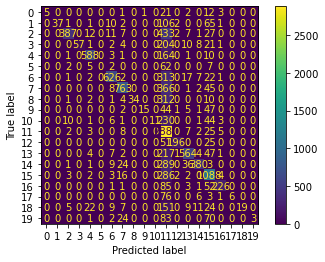

Ngram Level TF-iDF Vectors:
Precision, Recall, F-Score:
(0.4538679927393089, 0.368637905962191, 0.30644028250483474, None) 

Accuracy:
0.368637905962191 

Balanced Accuracy Below
0.15242825897125575 



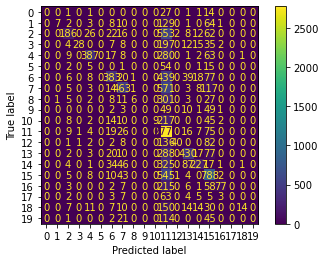

In [26]:
# Naive Bayes on Count Vectors
print("Count Vectors:")
train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)


# Naive Bayes on Ngram Level TF IDF Vectors
print("Ngram Level TF-iDF Vectors:")
train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)


# SVM

Count Vectors:
Precision, Recall, F-Score:
(0.5027038824638094, 0.4335918565196316, 0.3888122677773839, None) 

Accuracy:
0.4335918565196316 

Balanced Accuracy Below
0.22456366520874135 



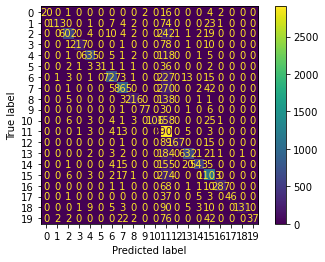

Ngram Level TF-iDF Vectors:
Precision, Recall, F-Score:
(0.4290810731331414, 0.3446437227338827, 0.2831910607401658, None) 

Accuracy:
0.3446437227338827 

Balanced Accuracy Below
0.14912489729959091 



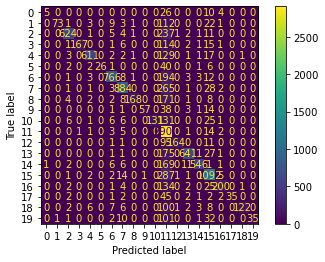

In [30]:
# SVM on Count Vectors
print("Count Vectors:")
train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)


# SVM on Ngram Level TF IDF Vectors
print("Ngram Level TF-iDF Vectors:")
train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)

# Random Forest

Count Vectors:
Precision, Recall, F-Score:
(0.537901172532644, 0.46437227338826953, 0.4221754998937204, None) 

Accuracy:
0.46437227338826953 

Balanced Accuracy Below
0.3073494148558801 



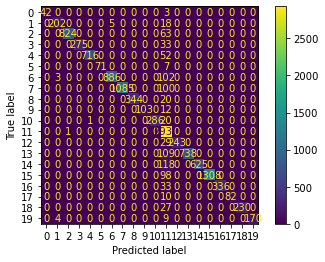

Ngram Level TF-iDF Vectors:
Precision, Recall, F-Score:
(0.3427731776620272, 0.35651963160445954, 0.3242842822998551, None) 

Accuracy:
0.35651963160445954 

Balanced Accuracy Below
0.2291533736006545 



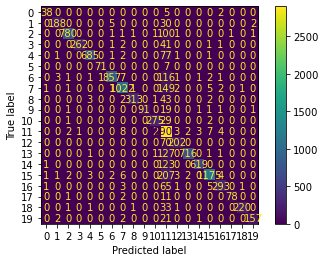

In [31]:
# Random Forest on Count Vectors
print("Count Vectors:")
train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)


# Random Forest on Ngram Level TF IDF Vectors
print("Ngram Level TF-iDF Vectors:")
train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)

# Logistic Regression

Count Vectors:
Precision, Recall, F-Score:
(0.5294373258880268, 0.4624333494910325, 0.4175510845217892, None) 

Accuracy:
0.4624333494910325 

Balanced Accuracy Below
0.29912444513485414 



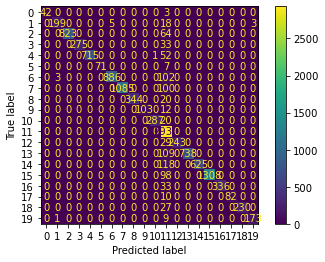

Ngram Level TF-iDF Vectors:
Precision, Recall, F-Score:
(0.34224012202215714, 0.3538536112457586, 0.3226472715435586, None) 

Accuracy:
0.3538536112457586 

Balanced Accuracy Below
0.23072432383358238 



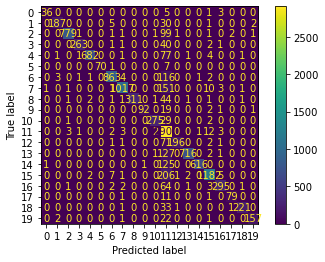

In [32]:
# Logistic Regression on Count Vectors
print("Count Vectors:")
train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)


# Logistic Regression on Ngram Level TF IDF Vectors
print("Ngram Level TF-iDF Vectors:")
train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)

# Multi-Layer Perceptron

Count Vectors:
Precision, Recall, F-Score:
(0.5712530084058745, 0.5576829859428017, 0.5505879663827775, None) 

Accuracy:
0.5576829859428017 

Balanced Accuracy Below
0.4687963386031823 



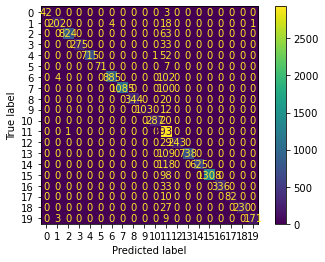

Ngram Level TF-iDF Vectors:
Precision, Recall, F-Score:
(0.322989902451795, 0.32767813863305867, 0.3189242886345696, None) 

Accuracy:
0.32767813863305867 

Balanced Accuracy Below
0.24395872019673098 



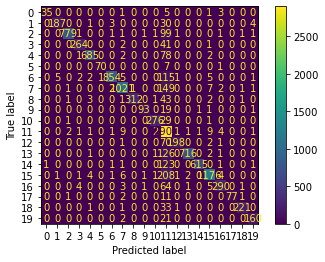

In [33]:
#MLP on Count Vectors
print("Count Vectors:")
train_model(neural_network.MLPClassifier(), xtrain_count, train_y, xvalid_count)


# MLP on Ngram Level TF IDF Vectors
print("Ngram Level TF-iDF Vectors:")
train_model(neural_network.MLPClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)